<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/49_C_Datos_A_E_Datos_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XIII- Análisis Exploratorio de Datos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para visualizacion de datos
%matplotlib inline
import seaborn as sns # para visualizacion de datos
from scipy import stats
import warnings # Para ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


# **214. Parte I: Ejemplo 1.  Análisis de Componentes Princiapales (PCA) - Análisis Exploratorio de Datos**

# **a. Base de datos - PCA**
+ Seleccionamos la base de datos a trabajar: Tengo 9 columnas y 17000 registros
+ El Algoritmo PCA nos va a mostrar la dirección donde hay la mayor varianza. Es decir, en grafico de od caracerística la lina de tendencia sera nuestra "Primera componete principal"
+ Despues busca un eje ortogonal al primero y toma estos dos ejes como los nuevos parametros.


In [ ]:
#**a. Eligimos nuestra base de datos**
datos_train=pd.read_csv("/content/sample_data/california_housing_train.csv",delimiter=',')
datos_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


# **b. La dimensión de la data**

In [ ]:
# **b. La dimensión de la data**
datos_train.shape


(17000, 9)

# **c. Veamos si la data contiene datos perdidos**

In [ ]:
# **c. Veamos si contiene datos perdidos**
datos_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

# **d. Veamos si contiene datos perdidos**
+ Como en la parte _c_ no se observan todas las variables, sumamos todos los resultado y no tenemos un problema de imputacion de datos

In [ ]:
# **d. Veamos si contiene datos perdidos**
datos_train.isnull().sum().sum()

0

# **e. PCA es solo con variables cuantitativas**
+ Verifiquemos que solo trabajaremos con variables cuantitativas

In [ ]:
# **e. PCA es solo con variables cuantitativas**
datos_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
datos_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

# **f. Preguntemonos si hay correlación entre las variables**

In [ ]:
# **f. Preguntemonos si hay correlación entre las variables**
df_corr = datos_train.corr() # Metodo ()
df_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


# **g. Realicemos el mapa de calor**

<Axes: >

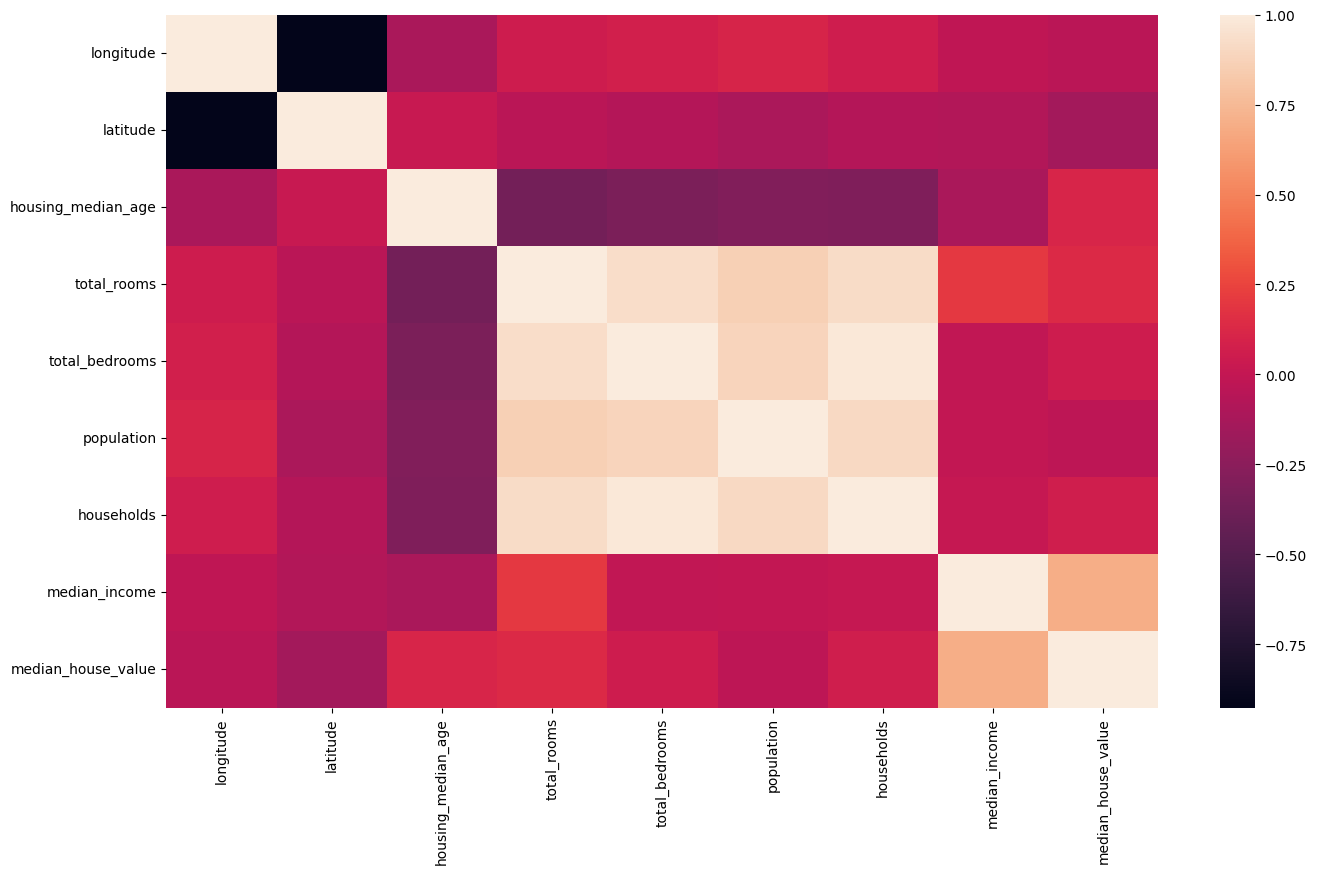

In [ ]:
# **g. Realicemos el mapa de calor**
plt.figure(figsize=(16,9)) # Tamaño del grafico
sns.heatmap(df_corr)

# **h. Triangulo de correlación y mapa de calor - Heatmap**
+ **La evidencia de una fuerte correlacion entre las variables es un indicio de que hay que usar el métodos de componentes principales**

<ipython-input-31-d1d3925a5c0a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


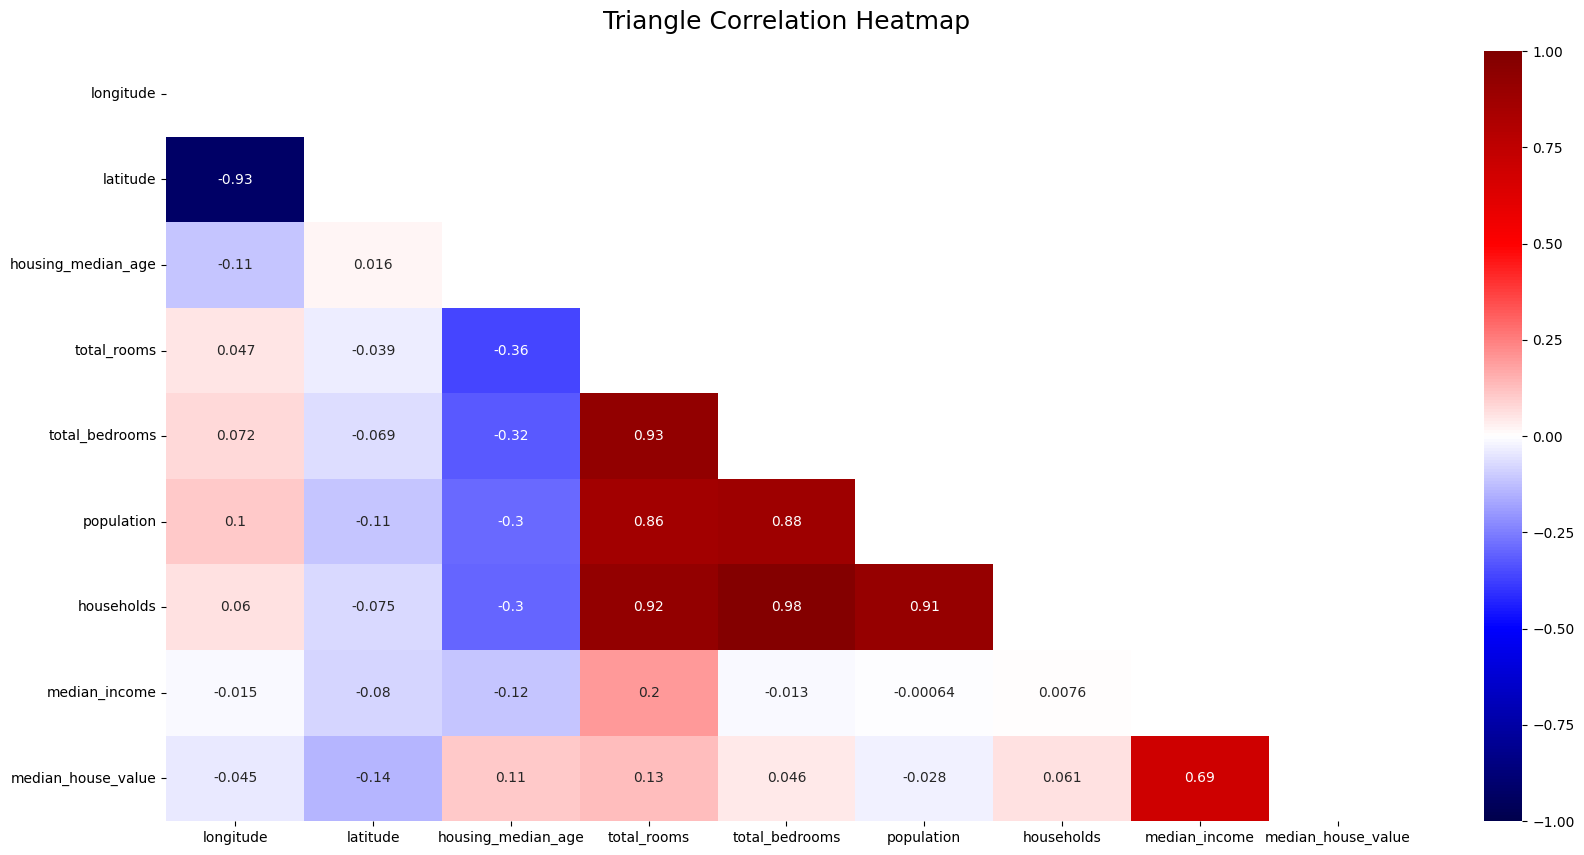

In [ ]:
# **h. Triangulo de correlación y mapa de calor - Heatmap**
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
heatmap = sns.heatmap(df_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

# **i. Matriz de Covarianza**

In [ ]:
# **i. Matriz de Covarianza**
datos_train.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.020692,-3.965185,-2.883552,2.054900e+02,6.068533e+01,2.340172e+02,4.597465e+01,-0.059248,-1.046125e+04
latitude,-3.965185,4.568221,0.442652,-1.806526e+02,-6.249720e+01,-2.729633e+02,-6.155858e+01,-0.327506,-3.592438e+04
housing_median_age,-2.883552,0.442652,158.430983,-9.904993e+03,-1.700027e+03,-4.275002e+03,-1.465312e+03,-2.784428,1.558535e+05
total_rooms,205.489998,-180.652575,-9904.992690,4.752169e+06,8.530598e+05,2.152369e+06,7.703534e+05,812.729998,3.311968e+07
total_bedrooms,60.685329,-62.497196,-1700.026828,8.530598e+05,1.776618e+05,4.263264e+05,1.589829e+05,-10.853597,2.238200e+06
population,234.017167,-272.963262,-4275.001960,2.152369e+06,4.263264e+05,1.317566e+06,4.013172e+05,-1.396588,-3.707743e+06
households,45.974646,-61.558579,-1465.311997,7.703534e+05,1.589829e+05,4.013172e+05,1.478563e+05,5.608393,2.721855e+06
median_income,-0.059248,-0.327506,-2.784428,8.127300e+02,-1.085360e+01,-1.396588e+00,5.608393e+00,3.641061,1.531215e+05
median_house_value,-10461.246889,-35924.378200,155853.476977,3.311968e+07,2.238200e+06,-3.707743e+06,2.721855e+06,153121.464474,1.345223e+10


# **j. Valores propios y vectores propios**

In [ ]:
# **j. Valores propios y vectores propios**

In [ ]:
from numpy.linalg import eig
valores, vectores = eig(datos_train.cov())
print('Imprima los valores propios',valores)
print('Imprima los vectores vectores propios', vectores)


Imprima los valores propios [1.34523171e+10 6.01809277e+06 2.60866893e+05 3.02947406e+04
 2.51130207e+03 1.32388897e+02 7.90806463e+00 2.08515405e-01
 1.22287901e+00]
Imprima los vectores vectores propios [[-7.77617213e-07  5.30325234e-05 -4.04360372e-04  6.82890034e-05
  -4.47492890e-03  1.84885658e-02  6.88404662e-01  7.25056413e-01
   5.49508057e-03]
 [-2.67051832e-06 -3.64816208e-05  8.25010481e-04  2.82039712e-04
   2.83247750e-03 -8.62186729e-03 -7.24856635e-01  6.88592518e-01
  -1.84413133e-02]
 [ 1.15838183e-05 -1.88293945e-03 -2.89805293e-03 -4.32552630e-03
   1.05368677e-02 -9.99470758e-01  1.94097446e-02  7.28856547e-03
  -2.20604184e-02]
 [ 2.46284620e-03  8.75704711e-01  4.58584208e-01  1.50366037e-01
   1.45780230e-02 -3.48786099e-03  4.96189259e-04 -1.21555057e-04
   9.10351881e-04]
 [ 1.66531812e-04  1.62513407e-01 -4.60146425e-02 -7.43424646e-01
  -6.47100493e-01 -3.73156481e-03 -3.33145963e-03 -6.63521063e-04
  -5.22503937e-03]
 [-2.75241866e-04  4.29992933e-01 -8.816

# **215. Parte II: Ejemplo 1.  Aplicando el Análisis de Componentes Princiapales (PCA) - Análisis Exploratorio de Datos**

# **a. Estandarizamos o escalamos las variables para datos_test**

In [ ]:
# **a. Estandarizamos o escalamos las variables para datos_test**

from sklearn.preprocessing import StandardScaler # Nuestra libreria para el PCA
std = StandardScaler() # Objeto de la clase StandarScaler tomara por defecto with_mean =0(True) y with_std =1(True)
datos_train_std = std.fit_transform(datos_train) # hace lo solicitado a la base de datos
datos_train_std

array([[ 2.619365  , -0.67152023, -1.07967114, ..., -0.07599796,
        -1.25254316, -1.21055773],
       [ 2.53956878, -0.57326437, -0.76187201, ..., -0.09940441,
        -1.08148298, -1.09674535],
       [ 2.4946834 , -0.90546278, -0.92077158, ..., -0.99925206,
        -1.17010515, -1.04846131],
       ...,
       [-2.36291168,  2.90780067, -0.92077158, ..., -0.11760942,
        -0.44666313, -0.89412482],
       [-2.36291168,  2.88908527, -0.76187201, ..., -0.06039367,
        -0.99778717, -1.04759909],
       [-2.387848  ,  2.29955006,  1.85997083, ..., -0.60134255,
        -0.45536288, -0.97172417]])

# **b. Vamos aplicar el escalado de variable en la tabla de test**
+ Esta base Tiene 300 filas

In [ ]:
# **b. Vamos apliacar el escalado de variable en la tabla de train**
datos_test=pd.read_csv("/content/sample_data/california_housing_test.csv",delimiter=',')
datos_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


# **c. Aplicamos el escalado para el test**

In [ ]:
# **c. Aplicamos el escalado para el test**
datos_test_std = std.transform(datos_test) # Ya no usamos el fit, puesto que ya se trae cuando usamos el std
datos_test_std

array([[-1.24077729,  0.81635434, -0.12627375, ...,  0.27249795,
         1.42808099,  1.18467554],
       [ 0.62944669, -0.63876828,  1.14492278, ..., -0.58313754,
        -0.1491421 , -0.26557009],
       [ 0.87382262, -0.86335312, -0.12627375, ..., -0.0161815 ,
         1.00090221,  0.54491201],
       ...,
       [-0.06877026,  0.3157173 , -1.47692006, ..., -0.73137834,
        -0.83542674, -1.25280626],
       [ 1.21794383, -0.71362989,  0.90657343, ..., -1.26712578,
        -0.32114563, -0.38628019],
       [-0.03385942, -0.56390666,  1.065473  , ..., -0.62734971,
         2.45124518,  2.52370406]])

# **d. Usamos la libreria donde esta la componente principal**

In [ ]:
# **d. Usamos la libreria donde esta la componente principal**
from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA() # n_components = 2

# Obtenemos los componentes principales

datos_train_std_pca = pca.fit(datos_train_std) # hace lo solicitado a la base de datos

# veamos lo que hizo
datos_train_std_pca

PCA()

# **e. Grafico para saber Cuanta varianza corresponde a cada componente**

In [ ]:
# **e. Cuanta varianza corresponde a cada componente**
datos_train_std_pca.explained_variance_ratio_.shape # nos muestra la misma cantidad de variables

(9,)

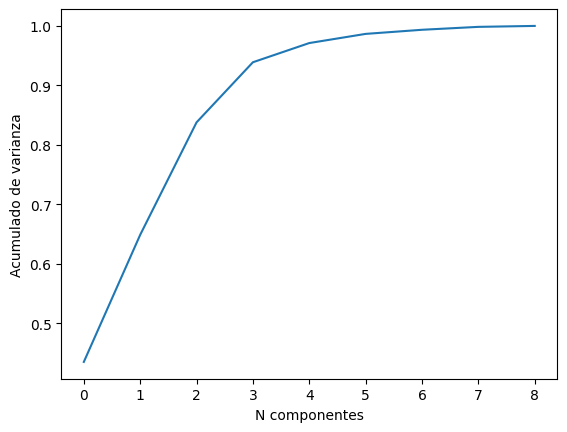

In [ ]:
# **e. Cuanta varianza corresponde a cada componente**
var_exp = np.cumsum(datos_train_std_pca.explained_variance_ratio_)# Esta es la varianza explicada
plt.plot(var_exp)
plt.xlabel('N componentes')
plt.ylabel('Acumulado de varianza')
plt.show()

# **f. Queremos saber cuantas componentes necesitamos**

In [ ]:
# **f. Queremos saber cuantas componentes necesitamos**
print('Cuantas componentes me explican mas del 80% de la varianza pero menos del 90%', np.where((var_exp>0.8)&(var_exp<0.90)))
print('Cuantas componentes me explican mas del 80% de la varianza pero menos del 95%', np.where((var_exp>0.8)&(var_exp<0.95)))
print('Cuantas componentes me explican mas del 85% de la varianza pero menos del 95%', np.where((var_exp>0.85)&(var_exp<0.95)))


Cuantas componentes me explican mas del 80% de la varianza pero menos del 90% (array([2]),)
Cuantas componentes me explican mas del 80% de la varianza pero menos del 905% (array([2, 3]),)
Cuantas componentes me explican mas del 85% de la varianza pero menos del 95% (array([3]),)


# **g. n_components elegidos**

In [ ]:
# **g. n_components elegidos**
n_components = 3

# **h. Usamos la libreria donde esta la componente principal**

In [ ]:
# **h. Usamos la libreria donde esta la componente principal**
from sklearn.decomposition import PCA

# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA(n_components = 3) # n_components = 2

# Obtenemos los componentes principales

datos_train_std_pca2 = pca.fit_transform(datos_train_std) # hace lo solicitado a la base de datos

# veamos lo que hizo
datos_train_std_pca2

array([[ 1.69145135, -1.52660764, -2.37960793],
       [ 2.82752636, -1.29046004, -2.11811765],
       [-1.42985566, -2.08170285, -2.24357609],
       ...,
       [-0.41160843,  3.79942235,  0.0707756 ],
       [-0.4059767 ,  3.93101519, -0.40284421],
       [-1.84706596,  3.30873503,  0.09773229]])

# **i. Las dimensiones**

In [ ]:
# **i. Las dimensiones**
datos_train_std_pca2.shape # Tenemos menos variables que las originales

(17000, 3)

# **j. Cantidad de variables de las originales**

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_# Pesos o coeficientes que nos muestra cuanto de cada variable original tienen nuestras nuevas variables

array([[ 0.07870846, -0.07835442, -0.21642309,  0.48382187,  0.48940309,
         0.47088592,  0.49095943,  0.05168568,  0.04220779],
       [-0.6589362 ,  0.68841404,  0.00479084,  0.06106196,  0.07425226,
         0.0490249 ,  0.07325765, -0.18687047, -0.19983391],
       [-0.25532228,  0.13569214,  0.04884434,  0.08986253, -0.03805756,
        -0.07430714, -0.0233927 ,  0.66937979,  0.67108172]])

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_.shape # Nos muestra que son tres variables combinado las 9

(3, 9)

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_.T # Hacemos la transpuesta de estos pesos que son las componentes

array([[ 0.07870846, -0.6589362 , -0.25532228],
       [-0.07835442,  0.68841404,  0.13569214],
       [-0.21642309,  0.00479084,  0.04884434],
       [ 0.48382187,  0.06106196,  0.08986253],
       [ 0.48940309,  0.07425226, -0.03805756],
       [ 0.47088592,  0.0490249 , -0.07430714],
       [ 0.49095943,  0.07325765, -0.0233927 ],
       [ 0.05168568, -0.18687047,  0.66937979],
       [ 0.04220779, -0.19983391,  0.67108172]])

In [ ]:
# **j. Cantidad de variables de las originales**
pca.components_.T.shape # Otra vez chequeamos las dimensones de nuestras matrices

(9, 3)

# **k. Matrices de las componentes principales**

In [ ]:
# **k. Matrices de las componentes principales**
pd.DataFrame(pca.components_.T)
list_namepca = [f'PC{i}' for i in range(1,4)]
df_pca_loading = pd.DataFrame(pca.components_.T, columns = list_namepca)
df_pca_loading

,PC1,PC2,PC3
0,0.078708,-0.658936,-0.255322
1,-0.078354,0.688414,0.135692
2,-0.216423,0.004791,0.048844
3,0.483822,0.061062,0.089863
4,0.489403,0.074252,-0.038058
5,0.470886,0.049025,-0.074307
6,0.490959,0.073258,-0.023393
7,0.051686,-0.186870,0.669380
8,0.042208,-0.199834,0.671082


# **l. Verificando si se cumple la propiedad de los eigen valores en el PCA**

In [ ]:
print('La suma de los coeficientes PC1 es igual a =',df_pca_loading[['PC1']].apply(lambda x:sum(x**2)))
print('La suma de los coeficientes PC2 es igual a =',df_pca_loading[['PC2']].apply(lambda x:sum(x**2)))
print('La suma de los coeficientes PC3 es igual a =',df_pca_loading[['PC3']].apply(lambda x:sum(x**2)))

La suma de los coeficientes PC1 es igual a = PC1    1.0
dtype: float64
La suma de los coeficientes PC2 es igual a = PC2    1.0
dtype: float64
La suma de los coeficientes PC3 es igual a = PC3    1.0
dtype: float64


# **m. Varianza explicada por la componente**

In [ ]:
# **m. Varianza explicada por la componente**
print('Cuanto de la varianza esta explicando la componentes principal', pca.explained_variance_ratio_)
print('Total explicado por las componentes elegidas', np.sum(pca.explained_variance_ratio_))


Cuanto de la varianza esta explicando la componentes principal [0.43517365 0.2136394  0.18906653]
Total explicado por las componentes elegidas 0.8378795767814624


# **n. Graficando los puntos**

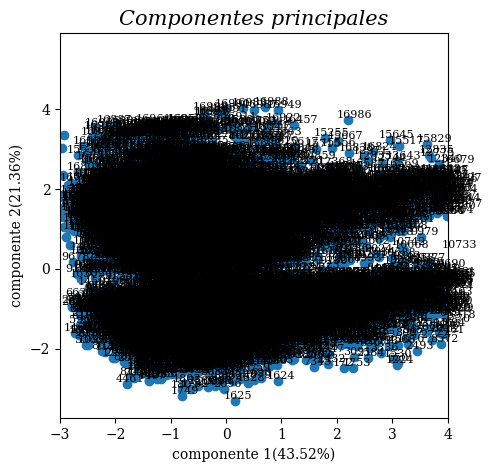

In [ ]:
# **n. Graficando los puntos**
fig = plt.figure(figsize=(5,5)) # figura
plt.rcParams['font.family']='serif' # Estilo

x_label = 'componente 1('+str(round(pca.explained_variance_ratio_[0]*100,2))+'%)'

y_label = 'componente 2('+str(round(pca.explained_variance_ratio_[1]*100,2))+'%)'

nombres = datos_train.index

ax = fig.add_subplot(1,1,1) # vamos a crear solamente un grafico y lo guardamos en el objeto ax
ax.set_xlabel(x_label, fontsize = 10) # nombre de los ejes
ax.set_ylabel(y_label, fontsize = 10)
ax.set_title('Componentes principales', fontsize = 15, fontstyle = 'italic')
ax.set_xlim(-3,4) # rango de valores del eje x

ax.scatter (x = datos_train_std_pca2[:,0], y = datos_train_std_pca2[:,1]) # s = 20 tamaño de ls puntos

for i, nombre in enumerate(nombres):
  ax.annotate(nombre, (datos_train_std_pca2[i,0]-0.2, datos_train_std_pca2[i,1]+0.05),fontsize = 8 )

plt.show()